In [246]:
import networkx as nx
import sqlite3
import pandas as pd
import numpy as np

In [2]:
conn = sqlite3.connect("airbnb_dirty-csv.openrefine-2.db")

cursor = conn.cursor()

In [123]:
cc_ids = list(cursor.execute("SELECT * from col_dependency a,state_command b where (a.state_id=b.state_id) and b.command<>'com.google.refine.model.changes.ColumnMoveChange'"))

In [124]:
def clean_dot(x):
    if x==-1:
        return "start"  
    elif x==-2:
        return "removed"
    else:
        return x

In [125]:
cc_ids

[(0,
  26,
  8,
  0,
  '1611854777058',
  'com.google.refine.model.changes.ColumnAdditionChange'),
 (0,
  26,
  17,
  0,
  '1611854777058',
  'com.google.refine.model.changes.ColumnAdditionChange'),
 (4, 3, 3, 4, '1594503237787', 'com.google.refine.model.changes.CellChange'),
 (8, 19, 19, 8, '1594402057321', 'com.google.refine.model.changes.CellChange'),
 (9,
  19,
  19,
  9,
  '1594399699296',
  'com.google.refine.model.changes.ColumnRenameChange'),
 (10,
  18,
  18,
  10,
  '1592858364580',
  'com.google.refine.model.changes.MassCellChange'),
 (11,
  17,
  17,
  11,
  '1592858296716',
  'com.google.refine.model.changes.MassCellChange'),
 (12,
  17,
  17,
  12,
  '1592858935386',
  'com.google.refine.model.changes.MassCellChange'),
 (13,
  16,
  16,
  13,
  '1592858873750',
  'com.google.refine.model.changes.MassCellChange'),
 (14,
  16,
  16,
  14,
  '1592858402868',
  'com.google.refine.model.changes.MassCellChange'),
 (15,
  20,
  20,
  15,
  '1592858307065',
  'com.google.refine.m

In [126]:
col_graph = nx.MultiDiGraph()
for x in cc_ids:
    col_graph.add_edge(clean_dot(x[2]),clean_dot(x[1]),state=x[0])

In [127]:
!which python

/opt/anaconda3/bin/python


In [128]:
from matplotlib import pyplot as plt

In [129]:
col_graph.edges()

OutMultiEdgeDataView([(8, 26), (8, 8), (8, 8), (17, 26), (17, 17), (17, 17), (17, 17), (17, 18), (3, 3), (3, 3), (3, 3), (3, 19), (3, 20), (19, 19), (19, 19), (19, 19), (19, 19), (18, 18), (18, 18), (18, 18), (18, 18), (18, 18), (16, 16), (16, 16), (16, 16), (16, 17), (20, 20), (20, 20), (23, 23), (23, 23), (23, 23), (22, 22), (22, 22), (22, 22), (22, 23), (10, 25), (10, 10), (9, 24), (9, 9), (1, 22), (1, 1), (1, 1), (12, 21), (12, 12), (6, 'removed'), (6, 6), (5, 16), (5, 5), (5, 5), (15, 15), (14, 14), (13, 13), (11, 11), (7, 7), (2, 2), ('start', 0), ('start', 1), ('start', 2), ('start', 3), ('start', 4), ('start', 5), ('start', 6), ('start', 7), ('start', 8), ('start', 9), ('start', 10), ('start', 11), ('start', 12), ('start', 13), ('start', 14), ('start', 15)])

In [130]:
nx.get_edge_attributes(col_graph,"state")

{(8, 26, 0): 0,
 (8, 8, 0): 51,
 (8, 8, 1): 52,
 (17, 26, 0): 0,
 (17, 17, 0): 11,
 (17, 17, 1): 12,
 (17, 17, 2): 38,
 (17, 18, 0): 37,
 (3, 3, 0): 4,
 (3, 3, 1): 55,
 (3, 3, 2): 56,
 (3, 19, 0): 32,
 (3, 20, 0): 32,
 (19, 19, 0): 8,
 (19, 19, 1): 9,
 (19, 19, 2): 17,
 (19, 19, 3): 18,
 (18, 18, 0): 10,
 (18, 18, 1): 33,
 (18, 18, 2): 34,
 (18, 18, 3): 35,
 (18, 18, 4): 36,
 (16, 16, 0): 13,
 (16, 16, 1): 14,
 (16, 16, 2): 40,
 (16, 17, 0): 39,
 (20, 20, 0): 15,
 (20, 20, 1): 16,
 (23, 23, 0): 19,
 (23, 23, 1): 20,
 (23, 23, 2): 25,
 (22, 22, 0): 21,
 (22, 22, 1): 22,
 (22, 22, 2): 27,
 (22, 23, 0): 26,
 (10, 25, 0): 23,
 (10, 10, 0): 46,
 (9, 24, 0): 24,
 (9, 9, 0): 47,
 (1, 22, 0): 28,
 (1, 1, 0): 57,
 (1, 1, 1): 58,
 (12, 21, 0): 29,
 (12, 12, 0): 30,
 (6, 'removed', 0): 31,
 (6, 6, 0): 49,
 (5, 16, 0): 41,
 (5, 5, 0): 53,
 (5, 5, 1): 54,
 (15, 15, 0): 42,
 (14, 14, 0): 43,
 (13, 13, 0): 44,
 (11, 11, 0): 45,
 (7, 7, 0): 48,
 (2, 2, 0): 50,
 ('start', 0, 0): -1,
 ('start', 1, 0): -

In [131]:
col_graph.edges(data=True)

OutMultiEdgeDataView([(8, 26, {'state': 0}), (8, 8, {'state': 51}), (8, 8, {'state': 52}), (17, 26, {'state': 0}), (17, 17, {'state': 11}), (17, 17, {'state': 12}), (17, 17, {'state': 38}), (17, 18, {'state': 37}), (3, 3, {'state': 4}), (3, 3, {'state': 55}), (3, 3, {'state': 56}), (3, 19, {'state': 32}), (3, 20, {'state': 32}), (19, 19, {'state': 8}), (19, 19, {'state': 9}), (19, 19, {'state': 17}), (19, 19, {'state': 18}), (18, 18, {'state': 10}), (18, 18, {'state': 33}), (18, 18, {'state': 34}), (18, 18, {'state': 35}), (18, 18, {'state': 36}), (16, 16, {'state': 13}), (16, 16, {'state': 14}), (16, 16, {'state': 40}), (16, 17, {'state': 39}), (20, 20, {'state': 15}), (20, 20, {'state': 16}), (23, 23, {'state': 19}), (23, 23, {'state': 20}), (23, 23, {'state': 25}), (22, 22, {'state': 21}), (22, 22, {'state': 22}), (22, 22, {'state': 27}), (22, 23, {'state': 26}), (10, 25, {'state': 23}), (10, 10, {'state': 46}), (9, 24, {'state': 24}), (9, 9, {'state': 47}), (1, 22, {'state': 28}), 

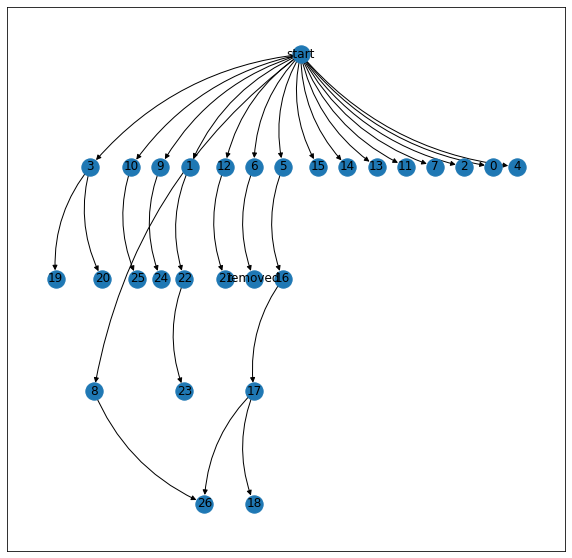

In [132]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
pos = nx.nx_pydot.graphviz_layout(col_graph,prog="dot")
#nx.draw_networkx(col_graph,pos=pos,connectionstyle='arc3, rad = 0.2')
edge_labels=dict([((u,v,),d['state'])
             for u,v,d in col_graph.edges(data=True)])
nx.draw_networkx(col_graph,pos=pos,connectionstyle='arc3, rad = 0.2')
#nx.draw_networkx_edge_labels(col_graph, pos, edge_labels=edge_labels,connectionstyle='arc3, rad = 0.2')
plt.show()

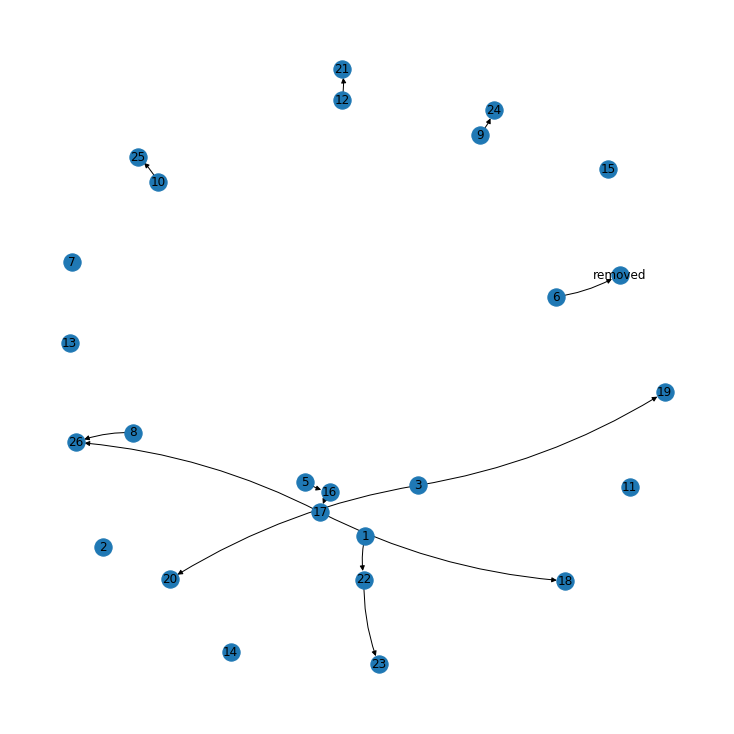

In [110]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(col_graph)
nx.draw(col_graph, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['state'])
             for u,v,d in col_graph.edges(data=True)])


In [15]:
import clingo
class Context:
    def id(self, x):
        return x
    def seq(self, x, y):
        return [x, y]

def on_model(m):
    print(m)

ctl = clingo.Control()
ctl.add("base", [], """\
p(@id(10)).
q(@seq(1,2)).
""")
ctl.ground([("base", [])], context=Context())
ctl.solve(on_model=on_model)

p(10) q(1) q(2)


SAT

In [16]:
!pwd

/Users/nnp2/Documents/projects/openrefine


In [17]:
import sys
import clingo

class Application:
    def __init__(self, name):
        self.program_name = name

    def main(self, ctl, files):
        if len(files) > 0:
            for f in files:
                ctl.load(f)
        else:
            ctl.load("-")
        ctl.ground([("base", [])])
        #ctl.solve()
        ctl.solve(on_model=on_model)

clingo.clingo_main(Application("03_poster_demo.openrefine.extract/facts.pl"), "")

10

In [18]:
ctl = clingo.Control()
#with open("03_poster_demo.openrefine.extract/facts.pl","r") as files:
#    for f in files:
ctl.load("03_poster_demo.openrefine.extract/facts.pl")
ctl.add("base",[],"""
#show cell/1.
""")

In [19]:
ctl.solve(on_model=on_model)

SAT

In [20]:
from clyngor import ASP, solve

answers = ASP("""
rel(a,(c;d)). rel(b,(d;e)).
obj(X):- rel(X,_) ; rel(X,Y): att(Y).
att(Y):- rel(_,Y) ; rel(X,Y): obj(X).
:- not obj(X):obj(X).
:- not att(Y):att(Y).
""")
for answer in answers:
    print(answer)


frozenset({('obj', ('b',)), ('rel', ('b', 'e')), ('obj', ('a',)), ('rel', ('b', 'd')), ('rel', ('a', 'c')), ('att', ('d',)), ('rel', ('a', 'd'))})
frozenset({('att', ('c',)), ('rel', ('b', 'e')), ('obj', ('a',)), ('rel', ('b', 'd')), ('rel', ('a', 'c')), ('att', ('d',)), ('rel', ('a', 'd'))})
frozenset({('obj', ('b',)), ('rel', ('b', 'e')), ('att', ('e',)), ('rel', ('b', 'd')), ('rel', ('a', 'c')), ('att', ('d',)), ('rel', ('a', 'd'))})


In [21]:
answers = solve('03_poster_demo.openrefine.extract/facts.pl'); # also accepts an iterable of file

In [22]:
for answer in answers.by_predicate:
    print(answer["row_position"],answer["cell"])
    #print(answer)

frozenset({(3, 1, 1, -1), (5, 2, 1, 0), (1, 1, -1, 0), (2, 2, -1, 1), (0, 0, -1, -1), (4, 0, 1, 1)}) frozenset({(1, 1, 0), (8, 2, 2), (2, 2, 0), (7, 1, 2), (0, 0, 0), (4, 1, 1), (5, 2, 1), (3, 0, 1), (6, 0, 2)})


In [23]:
for x in answers:
    print(x)

In [24]:
import clyngor

In [25]:
answers = clyngor.solve(["03_poster_demo.openrefine.extract/facts.pl","rules/column_query.pl"],inline="""
state(N) :- N=1.
#show q1/1.
""")
for x in answers:
    print(x)

frozenset({('q1', ('"03_poster_demo.openrefine.tar.gz"',))})


In [26]:
answers = clyngor.solve(["03_poster_demo.openrefine.extract/facts.pl","rules/column_query.pl"],inline="""
state(N) :- N=1.
all_column_schema_at_before_state_test(A,B) :-
    all_column_schema_at_before_state(A,B),
    state(B).
all_column_schema_at_state_test(A,B,C) :-
    all_column_schema_at_state(A,B,C),
    state(C).    
#show column_order/1.    
""")
for x in answers:
    print(x)

frozenset({('column_order', (('cons', (('col_name', (-1, 0, '"Title"')), 3, ('cons', (('col_name', (0, 1, '"Author"')), 2, ('cons', (('col_name', (1, 2, '"Date"')), 1, 'empty')))))),))})


# Show me the state dependency

In [27]:
import clyngor
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
#dname = "03_poster_demo.openrefine.tar.gz"
facts_file="airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
dname = "airbnb_dirty-csv.openrefine-2.tar.gz"
def state_dependency(facts_file,dname):
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    dataset_name(N) :- N="{dname}".
    state(N) :- N=-1.
    #show state_edge/2.
    """.format(dname=dname))

    state_graph = nx.DiGraph()

    for x in answers.by_predicate:
        #print(x["all_column_name_at_state_test"])
        for y in x["state_edge"]:
            #print(y[0][1],y[0][2])
            #print(y[0])
            #print(y[1])            
            #state_graph.add_node(y[0][1],col_name=y[2],col_schema_id=y[4])
            state_graph.add_edge(y[0][1][0],y[0][1][1],op_name=y[0][1][2])
            state_graph.add_edge(y[1][1][0],y[1][1][1],op_name=y[1][1][2])

    #print(state_graph.edges)
    state_path = nx.dag_longest_path(state_graph)
    #print(state_path)
    #state_name = nx.get_edge_attributes(state_graph)
    #print(state_name)
    state_schema = []
    state_names = nx.get_edge_attributes(state_graph,"op_name")
    for i,x in enumerate(state_path[:-1]):
        #col_schema.append((x,col_name[x]))            
        state_schema.append((state_path[i],state_names[(x,state_path[i+1])]))
        #print(state_name)

    state_schema.append((state_path[i+1],"original"))


    #print(state_schema)
    return state_schema
state_schema = state_dependency(facts_file,dname)
state_schema
    

[(-1, '"com.google.refine.model.changes.ColumnAdditionChange"'),
 (0, '"com.google.refine.model.changes.RowRemovalChange"'),
 (1, '"com.google.refine.model.changes.RowStarChange"'),
 (2, '"com.google.refine.model.changes.RowStarChange"'),
 (3, '"com.google.refine.model.changes.CellChange"'),
 (4, '"com.google.refine.model.changes.RowReorderChange"'),
 (5, '"com.google.refine.model.changes.RowReorderChange"'),
 (6, '"com.google.refine.model.changes.ColumnMoveChange"'),
 (7, '"com.google.refine.model.changes.CellChange"'),
 (8, '"com.google.refine.model.changes.ColumnRenameChange"'),
 (9, '"com.google.refine.model.changes.MassCellChange"'),
 (10, '"com.google.refine.model.changes.MassCellChange"'),
 (11, '"com.google.refine.model.changes.MassCellChange"'),
 (12, '"com.google.refine.model.changes.MassCellChange"'),
 (13, '"com.google.refine.model.changes.MassCellChange"'),
 (14, '"com.google.refine.model.changes.MassCellChange"'),
 (15, '"com.google.refine.model.changes.MassCellChange"'),

## What are the column names and orders at state ?

In [30]:
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
facts_file="airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
dname = "airbnb_dirty-csv.openrefine-2.tar.gz"

def col_schema_at_state(facts_file,dname,state):
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    dataset_name(N) :- N="{dname}".
    state(N) :- N={state}.
    all_column_schema_at_before_state_test(A,B) :-
        all_column_schema_at_before_state(A,B),
        state(B).
    all_column_schema_at_state_test(A,B,C) :-
        all_column_schema_at_state(A,B,C),
        state(C).    
    #show all_column_name_at_state_test/5.    
    """.format(state=state,dname=dname))

    col_graph = nx.DiGraph()
    for x in answers.by_predicate:
        #print(x["all_column_name_at_state_test"])
        for y in x["all_column_name_at_state_test"]:
            #print(y)
            col_graph.add_node(y[1],col_name=y[2],col_schema_id=y[4])
            col_graph.add_edge(y[3],y[1])
    col_path = nx.dag_longest_path(col_graph)
    col_name = nx.get_node_attributes(col_graph,"col_name")
    col_schema = []
    for x in col_path[1:]:
        col_schema.append((x,col_name[x]))
    return col_schema
col_schema = col_schema_at_state(facts_file,dname,-1)
col_schema
    

[(0, '"id"'),
 (1, '"name"'),
 (22, '"name_grel"'),
 (23, '"name_grel_star"'),
 (2, '"host_id"'),
 (19, '"host_name 1 test"'),
 (3, '"host_name"'),
 (20, '"host_name 2"'),
 (5, '"neighbourhood"'),
 (16, '"neighbourhood_case"'),
 (17, '"neighbourhood_loop"'),
 (26, '"test_combine"'),
 (18, '"neighbourhood_cluster"'),
 (6, '"latitude"'),
 (7, '"longitude"'),
 (8, '"room_type"'),
 (9, '"price"'),
 (24, '"price_crazy"'),
 (10, '"minimum_nights"'),
 (25, '"minimum_nights_long"'),
 (11, '"number_of_reviews"'),
 (12, '"last_review"'),
 (21, '"last_review_timeless"'),
 (13, '"reviews_per_month"'),
 (14, '"calculated_host_listings_count"'),
 (15, '"availability_365"')]

In [250]:
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts.pl"
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
facts_file = "ipaw_2021_demo.openrefine.extract/facts_content_excluded.pl"
#dname = "airbnb_dirty-csv.openrefine-2.tar.gz"
dname = "ipaw_2021_demo.openrefine.tar.gz"

#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
#dname = "03_poster_demo.openrefine.extract.tar.gz"

#row_graph = nx.DiGraph()

def row_order_at_state(facts_file,dname,state):
    # column_query.pl general_query.pl
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""    
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".
    #show row_position_at_state_test/4.
    """.format(state=state,dname=dname))

    row_graph = nx.DiGraph()
    for x in answers.by_predicate:
        for y in x["row_position_at_state_test"]:
            #print(y)
            row_graph.add_node(y[1],row_schema_id=y[0])
            row_graph.add_edge(y[3],y[1])
    row_path = nx.dag_longest_path(row_graph)
    row_order = []
    for x in row_path[1:]:
        row_order.append(x)
    return row_order

row_order = row_order_at_state(facts_file,dname,4)
row_order[:20],len(row_order)
    

([0, 1, 3, 2], 4)

### What are the column values at state ?

In [251]:
"""
select a.content_id,b.col_id,b.row_id,c.value_text from content a, cell b, value c where a.cell_id = b.cell_id and c.value_id=a.value_id
"""

'\nselect a.content_id,b.col_id,b.row_id,c.value_text from content a, cell b, value c where a.cell_id = b.cell_id and c.value_id=a.value_id\n'

In [255]:
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
#dname = "03_poster_demo.openrefine"
#facts_file = "airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
#dname = "airbnb_dirty-csv.openrefine-2"
facts_file = "ipaw_2021_demo.openrefine.extract/facts_content_excluded.pl"
dname = "ipaw_2021_demo.openrefine"

import numpy as np
import tqdm
answers = None
def cell_content_at_state(facts_file,dname,state):
    dbname = dname + ".db"
    dname = dname + ".tar.gz"
    col_schema = col_schema_at_state(facts_file,dname,state)
    print("col_order")
    row_order = row_order_at_state(facts_file,dname,state)
    print("row_order")

    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".

    content(-1,nul,nul,nul,nul).

    change_content_at_before_state(PrevContentId, StateId) :-
        content(ContentId, _, NextColumnSchemaStateId, _, PrevContentId),
        NextColumnSchemaStateId <= StateId,
        state_num(StateId).

    change_content_at_state(ContentId, CellId, StateId) :-
        content(ContentId, CellId, AssignmentStateId, _, _),
        StateId >= AssignmentStateId,
        not change_content_at_before_state(ContentId, StateId),
        state_num(StateId).

    change_count_at_before_state(B) :- content(A,B,N,_,_),
        state(N).

    change_count_at_state(B) :- content(A,B,N,_,_),
        state(N).

    change_content_at_state_test(ContentId, CellId, StateId) :-
        change_content_at_state(ContentId, CellId, StateId),
        state(StateId).

    #show change_content_at_state_test/3.
    """.format(state=state,dname=dname))
    #print(list(answers))

    #col_graph = nx.DiGraph()

    col_len = max([x[0] for x in col_schema])+1
    row_len = max(row_order)+1

    #print(col_len,row_len)    

    temp_table = np.empty((row_len,col_len),dtype=object)

    log_col = {}
    col_name = np.empty(col_len,dtype=object)
    for i,x in enumerate(col_schema):
        log_col[x[0]]=i
        col_name[x[0]] = eval(x[1])
    log_row = {}
    for i,x in enumerate(row_order):
        log_row[x]=i
    #print(row_order)
    #print(temp_table.shape)
    tt = []
    #return answers, log_col, log_row
    conn = sqlite3.connect(dbname)
    cursor = conn.cursor()

    for x in answers.by_predicate:
        #print(x)
        #print(x["all_column_name_at_state_test"])
        for y in x["change_content_at_state_test"]:
            #tt.append(y)
            #print(y)
            #print(y[3],y[2],y[4])
            #temp_table[log_row[y[3]],log_col[y[2]]] = eval(y[0])

            cts = list(cursor.execute("select a.content_id,b.col_id,b.row_id,c.value_text from content a, cell b, value c where a.cell_id = b.cell_id and c.value_id=a.value_id and a.content_id=?",(y[0],)))[0]
            if (cts[1]<col_len):
                temp_table[cts[2],cts[1]] = cts[3]
            
    cursor.close()        
    
    
    temp_pd = pd.DataFrame(temp_table)
    temp_pd.columns = col_name
    

    return temp_pd

test = cell_content_at_state(facts_file,dname,5)
    

col_order
row_order


In [256]:
facts_file,dname

('ipaw_2021_demo.openrefine.extract/facts_content_excluded.pl',
 'ipaw_2021_demo.openrefine')

In [296]:
col_schema = col_schema_at_state(facts_file,dname,5)
col_schema

[(0, '"TItle"'), (1, '"Author"'), (3, '"Author 1"'), (4, '"Author 2"')]

In [292]:
row_order_at_state(facts_file,dname,4)

[0, 1, 3, 2]

In [300]:
tt = cell_content_at_state(facts_file,dname,4)
tt.columns = ["TItle","Author","Date","Author 1","Author 2"]
tt.iloc[row_order_at_state(facts_file,dname,4)]

col_order
row_order


,TItle,Author,Date,Author 1,Author 2
0,Against Method,"Feyerabend, P.",1975,Feyerabend,None
1,Changing Order,"Collins, H.M.",1985,Collins,None
3,Theory of Information,,1992,None,None
2,Exceeding Our Grasp,"Stanford, P.K.",2006,Stanford,None


In [276]:
test2 = cell_content_at_state(facts_file,dname,8)


col_order
row_order


In [112]:
test2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30041063,(Quiet & Affordable Private BDR near UOC),225773707,LaShun,None,Woodlawn,41.77712429,-87.59471115,Private room,25,1,0,None,None,1,173
1,29960994,(Feel cozy in chicago),225262670,Karla,None,Edgewater,41.98536071,-87.66898893,Private room,70,2,0,None,None,1,179
2,29946929,(Cozy 2 Bedroom Apartment in the Heart of Chic...,225157895,Frankie,None,Lower West Side,41.85198185,-87.67767597,Entire home/apt,79,1,0,None,None,1,62
3,29940545,(Beautiful 7Br 6200 sf Brick & Steel Custom Ma...,225106605,Neda,None,Bridgeport,41.84452795,-87.6558587,Entire home/apt,300,2,0,None,None,1,355
4,29936021,"(Convenient, Beautiful, Spacious 2Br/2Ba Condo)",225076770,J,None,Mckinley Park,41.8296729,-87.67826309,Entire home/apt,70,1,0,None,None,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,3983057,(4 Cooperative Living in Hyde Park),2140,Lois And Ed,None,hyde park,41.79507237,-87.59332266,Private room,40,2,38,9/16/18,0.88,5,333
7590,3984079,(5 Sabbatical in Hyde Park),2140,Lois And Ed,None,hyde park,41.79718187,-87.59378733,Entire home/apt,150,2,10,7/23/18,0.31,5,55
7591,4011519,(1 A Hyde Park Co-op Living),2140,Lois And Ed,None,hyde park,41.79535661,-87.59219207,Private room,30,2,31,9/8/18,0.65,5,216
7592,29955320,(Explore Chicago by Foot),225219313,Milaina,None,Near West Side,41.8791222,-87.65005215,Private room,48,1,0,None,None,1,175


In [42]:
xx = list(test[0])

In [68]:
cursor.close()

In [ ]:
conn = sqlite3.connect("airbnb_dirty-csv.openrefine-2.db")
cursor = conn.cursor()

dd = []
for x in xx[0]:
    #print(x[1][0])
    cts = list(cursor.execute("select a.content_id,b.col_id,b.row_id,c.value_text from content a, cell b, value c where a.cell_id = b.cell_id and c.value_id=a.value_id and a.content_id=?",(x[1][0],)))
    dd.append(list(cts)[0])
    #print(list(cts))
    #break
cursor.close()    

In [ ]:
    cts = list(cursor.execute("select a.content_id,b.col_id,b.row_id,c.value_text from content a, cell b, value c where a.cell_id = b.cell_id and c.value_id=a.value_id and a.content_id=?",(x[1][0],)))


In [39]:
facts_file = "03_poster_demo.openrefine.extract/facts.pl"
dname = "03_poster_demo.openrefine.extract.tar.gz"
#facts_file = "03_poster_demo.openrefine.extract/facts.pl"
#dname = "03_poster_demo.openrefine.tar.gz"

import numpy as np
def cell_content_at_state(facts_file,dname,state):
    col_schema = col_schema_at_state(facts_file,dname,state)
    row_order = row_order_at_state(facts_file,dname,state)


    answers = clyngor.solve([facts_file,"rules/column_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".

    content(-1,nul,nul,nul,nul).

    change_content_at_before_state(PrevContentId, StateId) :-
        content(ContentId, _, NextColumnSchemaStateId, _, PrevContentId),
        NextColumnSchemaStateId <= StateId,
        state_num(StateId).

    change_content_at_state(ContentId, CellId, StateId) :-
        content(ContentId, CellId, AssignmentStateId, _, _),
        StateId >= AssignmentStateId,
        not change_content_at_before_state(ContentId, StateId),
        state_num(StateId).

    change_count_at_before_state(B) :- content(A,B,N,_,_),
        state(N).

    change_count_at_state(B) :- content(A,B,N,_,_),
        state(N).

    change_content_at_state_test(ContentId, CellId, ColNum, RowNum, Value, StateId) :-
        change_content_at_state(ContentId, CellId, StateId),
        value(ValueId,Value),
        cell(CellId,ColNum,RowNum),
        content(ContentId,_,_,ValueId,_),
        state(StateId).

    #show change_content_at_state_test/6.
    """.format(state=state,dname=dname))
    #print(list(answers))

    #col_graph = nx.DiGraph()

    col_len = len(col_schema)
    row_len = len(row_order)

    temp_table = np.empty((row_len,col_len),dtype=object)

    log_col = {}
    col_name = np.empty(col_len,dtype=object)
    for i,x in enumerate(col_schema):
        log_col[x[0]]=i
        col_name[x[0]] = eval(x[1])
    log_row = {}
    for i,x in enumerate(row_order):
        log_row[x]=i

    return answers,log_col,log_row

    #print(row_order)
    #print(temp_table.shape)
    for x in answers.by_predicate:
        #print(x)
        #print(x["all_column_name_at_state_test"])
        for y in x["change_content_at_state_test"]:
            #print(y)
            #print(y[3],y[2],y[4])
            temp_table[log_row[y[3]],log_col[y[2]]] = eval(y[4])

            cts = list(cursor.execute("SELECT b.state_id,b.command,count(1) from content a,state_command b  where a.state_id >= 0 and a.state_id=b.state_id group by b.state_id order by b.state_id desc"))
            #cts = list(cursor.execute("SELECT * from content"))
            cts            
    
    temp_pd = pd.DataFrame(temp_table)
    temp_pd.columns = col_name

    return temp_pd

cell_content_at_state(facts_file,dname,5)
    

IndentationError: unexpected indent (<ipython-input-39-1cf53d949950>, line 78)

In [37]:
answers

In [39]:
facts_file = "03_poster_demo.openrefine.extract/facts.pl"
dname = "03_poster_demo.openrefine.tar.gz"

state_schema = state_dependency(facts_file,dname)
for x in state_schema[::-1]:
    print(x)
    print(cell_content_at_state(facts_file,dname,x[0]))


(5, 'original')
col_order


NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration

In [32]:
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
--- prototype
def row_order_at_state(facts_file,dname,state):
    answers = clyngor.solve([facts_file,"rules/column_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".
    #show row_position_at_state_test/4.
    """.format(state=state,dname=dname))

    row_graph = nx.DiGraph()
    for x in answers.by_predicate:
        for y in x["row_position_at_state_test"]:
            #print(y)
            row_graph.add_node(y[1],row_schema_id=y[0])
            row_graph.add_edge(y[3],y[1])
    row_path = nx.dag_longest_path(row_graph)
    row_order = []
    for x in row_path[1:]:
        row_order.append(x)
    return row_order

row_order = row_order_at_state(facts_file,dname,2)
row_order
    

In [27]:
conn = sqlite3.connect("airbnb_dirty-csv.openrefine-2.db")
cursor = conn.cursor()

In [40]:
#facts_file="airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
facts_file = "airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
dname = "airbnb_dirty-csv.openrefine-2.tar.gz"
def row_order_all(facts_file,dname):
    answers = clyngor.solve([facts_file,"rules/general_query.pl"],inline="""
    state(N) :- N={state}.
    dataset_name(N) :- N="{dname}".
    #show row_position_at_state/4.
    #show all_column_name_at_state/5.
    """.format(state=-1,dname=dname))

    row_graph_state = {}    
    col_graph_state = {}
    for x in answers.by_predicate:
        for y in x["row_position_at_state"]:
            #print(y)
            try:
                row_graph_state[y[2]]
            except:
                row_graph_state[y[2]] = nx.DiGraph()

            row_graph_state[y[2]].add_node(y[1],row_schema_id=y[0])
            row_graph_state[y[2]].add_edge(y[3],y[1])
        for y in x["all_column_name_at_state"]:
            #print(y)
            try:
                col_graph_state[y[0]]
            except:
                col_graph_state[y[0]] = nx.DiGraph()

            col_graph_state[y[0]].add_node(y[1],col_name=y[2],col_schema_id=y[4])
            col_graph_state[y[0]].add_edge(y[3],y[1])    


    row_order_state = {}
    for x,v in row_graph_state.items():
        row_path = nx.dag_longest_path(v)
        row_order = []
        for xx in row_path[1:]:
            row_order.append(xx)        
        row_order_state[x] = row_order

    col_order_state = {}
    for x,v in col_graph_state.items():
        col_path = nx.dag_longest_path(v)
        col_name = nx.get_node_attributes(v,"col_name")
        col_schema = []
        for xx in col_path[1:]:
            col_schema.append((xx,col_name[xx]))
        col_order_state[x] = col_schema

    return row_order_state,col_order_state

row_order_aa = row_order_all(facts_file,dname)
    

In [41]:
row_order_aa[0].keys(),row_order_aa[1].keys()

(dict_keys([40, 48, 45, 57, 29, 6, 1, 47, 35, 39, 32, 23, 15, 18, 53, 43, -1, 49, 56, 19, 46, 30, 41, 52, 42, 31, 27, 26, 9, 12, 24, 0, 3, 8, 36, 21, 7, 22, 13, 25, 2, 28, 50, 5, 44, 11, 4, 51, 10, 55, 58, 17, 54, 34, 20, 37, 38, 16, 14, 33, 'nul']),
 dict_keys([21, 18, 11, 50, 46, 52, 34, 49, 3, 17, 53, 24, 54, 14, 30, 10, 55, 38, -1, 33, 40, 35, 39, 45, 28, 16, 20, 41, 12, 31, 22, 47, 56, 51, 5, 19, 23, 32, 27, 7, 1, 42, 26, 4, 48, 25, 2, 6, 9, 44, 43, 8, 58, 13, 37, 0, 29, 36, 57, 15]))

In [75]:
# change of column order
init_col = 15
#init_state = -1
init_state =  58
min_state,max_state = min(row_order_aa[1].keys()),max(row_order_aa[1].keys())
init_col_log = row_order_aa[1][init_state][init_col][0]
#print(init_col_log)
for x in range(min_state,max_state):
    try:        
        print("state:",x,"column:",[y[0] for y in row_order_aa[1][x]].index(init_col_log))
    except:
        break


state: -1 column: 25
state: 0 column: 24
state: 1 column: 24
state: 2 column: 24
state: 3 column: 24
state: 4 column: 24
state: 5 column: 24
state: 6 column: 24
state: 7 column: 24
state: 8 column: 24
state: 9 column: 24
state: 10 column: 24
state: 11 column: 24
state: 12 column: 24
state: 13 column: 24
state: 14 column: 24
state: 15 column: 24
state: 16 column: 24
state: 17 column: 24
state: 18 column: 24
state: 19 column: 24
state: 20 column: 24
state: 21 column: 24
state: 22 column: 24
state: 23 column: 23
state: 24 column: 22
state: 25 column: 22
state: 26 column: 21
state: 27 column: 21
state: 28 column: 20
state: 29 column: 19
state: 30 column: 19
state: 31 column: 20
state: 32 column: 18
state: 33 column: 18
state: 34 column: 18
state: 35 column: 18
state: 36 column: 18
state: 37 column: 17
state: 38 column: 17
state: 39 column: 16
state: 40 column: 16
state: 41 column: 15
state: 42 column: 15
state: 43 column: 15
state: 44 column: 15
state: 45 column: 15
state: 46 column: 15
st

In [141]:
init_col_log

for x in col_graph.nodes():    
    print("target:",x,"path:",list(nx.all_simple_paths(col_graph,"start",x)))

target: 8 path: [['start', 8]]
target: 26 path: [['start', 5, 16, 17, 26], ['start', 8, 26]]
target: 17 path: [['start', 5, 16, 17]]
target: 3 path: [['start', 3]]
target: 19 path: [['start', 3, 19]]
target: 18 path: [['start', 5, 16, 17, 18]]
target: 16 path: [['start', 5, 16]]
target: 20 path: [['start', 3, 20]]
target: 23 path: [['start', 1, 22, 23]]
target: 22 path: [['start', 1, 22]]
target: 10 path: [['start', 10]]
target: 25 path: [['start', 10, 25]]
target: 9 path: [['start', 9]]
target: 24 path: [['start', 9, 24]]
target: 1 path: [['start', 1]]
target: 12 path: [['start', 12]]
target: 21 path: [['start', 12, 21]]
target: 6 path: [['start', 6]]
target: removed path: [['start', 6, 'removed']]
target: 5 path: [['start', 5]]
target: 15 path: [['start', 15]]
target: 14 path: [['start', 14]]
target: 13 path: [['start', 13]]
target: 11 path: [['start', 11]]
target: 7 path: [['start', 7]]
target: 2 path: [['start', 2]]
target: start path: []
target: 0 path: [['start', 0]]
target: 4 pa

In [145]:
nx.get_edge_attributes(col_graph,"state")
for x in nx.all_simple_paths(col_graph,"start",init_col_log):
    print(x)

['start', 15]


In [93]:
col_graph.nodes

NodeView((8, 26, 17, 3, 6, 5, 19, 18, 16, 20, 23, 22, 10, 25, 9, 24, 1, 12, 21, 'removed', 15, 14, 13, 11, 7, 2, 'start', 0, 4))

In [ ]:
col

In [151]:
init_col_log

8

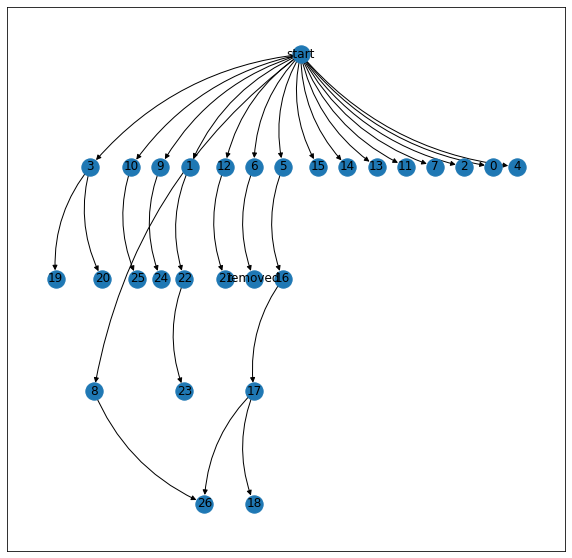

In [162]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
pos = nx.nx_pydot.graphviz_layout(col_graph,prog="dot")
#nx.draw_networkx(col_graph,pos=pos,connectionstyle='arc3, rad = 0.2')
edge_labels=dict([((u,v,),d['state'])
             for u,v,d in col_graph.edges(data=True)])
nx.draw_networkx(col_graph,pos=pos,connectionstyle='arc3, rad = 0.2')
#nx.draw_networkx_edge_labels(col_graph, pos, edge_labels=edge_labels,connectionstyle='arc3, rad = 0.2')
plt.show()

In [245]:
# change of column order
init_col = 5
init_row = 100
init_state = -1
#init_state =  58
min_state,max_state = min(row_order_aa[1].keys()),max(row_order_aa[1].keys())
init_col_log = row_order_aa[1][init_state][init_col][0]
init_row_log = row_order_aa[0][init_state][init_row]

node_required = set()
all_paths = list(nx.all_simple_paths(col_graph,"start",init_col_log))
for x in all_paths:
    #print(init_col,x)
    for y in x:
        node_required.add(y)
#print(node_required,all_paths)
state_dependency = {}
for u,v in nx.get_edge_attributes(col_graph,"state").items():
    try:
        state_dependency[v]
    except:
        state_dependency[v] = []
    state_dependency[v].append(u)    

#state_dependency = {v: u for u,v in nx.get_edge_attributes(col_graph,"state").items()}
#print(state_dependency)

print("column",init_col,"logical_column",init_col_log)

#print(init_col_log)
for x in range(min_state,max_state):
        cts = list(cursor.execute("select a.state_id,b.value_text from content a,value b,cell c where a.value_id=b.value_id and c.col_id=? and c.row_id =? and c.cell_id=a.cell_id and a.state_id<=? order by state_id desc",(init_col_log,init_row_log,x)))
        #print(cts)
        if len(cts)>0:
            val = cts[0][1]  
            if cts[0][0] == x:
                print("value changed")
            try:
                print("state:",x,"column:",[y[0] for y in row_order_aa[1][x]].index(init_col_log),"row:",row_order_aa[0][x].index(init_row_log),"value:",val)
            except BaseException as ex:
                print("state:",x)
                print(ex)
                pass
            #    print("state:",x)
            #    pass
        if x in state_dependency.keys():
            #print(state_dependency[x])
            for y in state_dependency[x]:
                if y[1] in node_required:
                    print("column_dependency:",state_dependency[x])



column 5 logical_column 19
value changed
state: -1 column: 5 row: 100 value: Timothy
column_dependency: [('start', 0, 0), ('start', 1, 0), ('start', 2, 0), ('start', 3, 0), ('start', 4, 0), ('start', 5, 0), ('start', 6, 0), ('start', 7, 0), ('start', 8, 0), ('start', 9, 0), ('start', 10, 0), ('start', 11, 0), ('start', 12, 0), ('start', 13, 0), ('start', 14, 0), ('start', 15, 0)]
state: 0 column: 5 row: 100 value: Timothy
state: 1 column: 5 row: 102 value: Timothy
state: 2 column: 5 row: 102 value: Timothy
state: 3 column: 5 row: 102 value: Timothy
state: 4 column: 5 row: 102 value: Timothy
column_dependency: [(3, 3, 0)]
state: 5 column: 5 row: 7491 value: Timothy
state: 6 column: 5 row: 7399 value: Timothy
state: 7 column: 6 row: 7399 value: Timothy
state: 8 column: 6 row: 7399 value: Timothy
column_dependency: [(19, 19, 0)]
state: 9 column: 6 row: 7399 value: Timothy
column_dependency: [(19, 19, 1)]
state: 10 column: 6 row: 7399 value: Timothy
state: 11 column: 6 row: 7399 value: Tim

In [241]:
init_col_log,state_dependency

(19,
 {0: (17, 26, 0),
  51: (8, 8, 0),
  52: (8, 8, 1),
  11: (17, 17, 0),
  12: (17, 17, 1),
  38: (17, 17, 2),
  37: (17, 18, 0),
  4: (3, 3, 0),
  55: (3, 3, 1),
  56: (3, 3, 2),
  32: (3, 20, 0),
  8: (19, 19, 0),
  9: (19, 19, 1),
  17: (19, 19, 2),
  18: (19, 19, 3),
  10: (18, 18, 0),
  33: (18, 18, 1),
  34: (18, 18, 2),
  35: (18, 18, 3),
  36: (18, 18, 4),
  13: (16, 16, 0),
  14: (16, 16, 1),
  40: (16, 16, 2),
  39: (16, 17, 0),
  15: (20, 20, 0),
  16: (20, 20, 1),
  19: (23, 23, 0),
  20: (23, 23, 1),
  25: (23, 23, 2),
  21: (22, 22, 0),
  22: (22, 22, 1),
  27: (22, 22, 2),
  26: (22, 23, 0),
  23: (10, 25, 0),
  46: (10, 10, 0),
  24: (9, 24, 0),
  47: (9, 9, 0),
  28: (1, 22, 0),
  57: (1, 1, 0),
  58: (1, 1, 1),
  29: (12, 21, 0),
  30: (12, 12, 0),
  31: (6, 'removed', 0),
  49: (6, 6, 0),
  41: (5, 16, 0),
  53: (5, 5, 0),
  54: (5, 5, 1),
  42: (15, 15, 0),
  43: (14, 14, 0),
  44: (13, 13, 0),
  45: (11, 11, 0),
  48: (7, 7, 0),
  50: (2, 2, 0),
  -1: ('start', 

In [240]:
list(nx.all_simple_paths(col_graph,"start",init_col_log))

[['start', 3, 19]]

In [242]:
nx.get_edge_attributes(col_graph,"state")

{(8, 26, 0): 0,
 (8, 8, 0): 51,
 (8, 8, 1): 52,
 (17, 26, 0): 0,
 (17, 17, 0): 11,
 (17, 17, 1): 12,
 (17, 17, 2): 38,
 (17, 18, 0): 37,
 (3, 3, 0): 4,
 (3, 3, 1): 55,
 (3, 3, 2): 56,
 (3, 19, 0): 32,
 (3, 20, 0): 32,
 (19, 19, 0): 8,
 (19, 19, 1): 9,
 (19, 19, 2): 17,
 (19, 19, 3): 18,
 (18, 18, 0): 10,
 (18, 18, 1): 33,
 (18, 18, 2): 34,
 (18, 18, 3): 35,
 (18, 18, 4): 36,
 (16, 16, 0): 13,
 (16, 16, 1): 14,
 (16, 16, 2): 40,
 (16, 17, 0): 39,
 (20, 20, 0): 15,
 (20, 20, 1): 16,
 (23, 23, 0): 19,
 (23, 23, 1): 20,
 (23, 23, 2): 25,
 (22, 22, 0): 21,
 (22, 22, 1): 22,
 (22, 22, 2): 27,
 (22, 23, 0): 26,
 (10, 25, 0): 23,
 (10, 10, 0): 46,
 (9, 24, 0): 24,
 (9, 9, 0): 47,
 (1, 22, 0): 28,
 (1, 1, 0): 57,
 (1, 1, 1): 58,
 (12, 21, 0): 29,
 (12, 12, 0): 30,
 (6, 'removed', 0): 31,
 (6, 6, 0): 49,
 (5, 16, 0): 41,
 (5, 5, 0): 53,
 (5, 5, 1): 54,
 (15, 15, 0): 42,
 (14, 14, 0): 43,
 (13, 13, 0): 44,
 (11, 11, 0): 45,
 (7, 7, 0): 48,
 (2, 2, 0): 50,
 ('start', 0, 0): -1,
 ('start', 1, 0): -

In [236]:
nx.get_edge_attributes(col_graph)

TypeError: get_edge_attributes() missing 1 required positional argument: 'name'

In [239]:
#[x[0] for x in row_order_aa[1][-1]]


[0,
 1,
 22,
 23,
 2,
 19,
 3,
 20,
 5,
 16,
 17,
 26,
 18,
 6,
 7,
 8,
 9,
 24,
 10,
 25,
 11,
 12,
 21,
 13,
 14,
 15]

In [182]:
col_graph.get_edge_data(8,8)


{0: {'state': 51}, 1: {'state': 52}}

{0: (17, 26, 0),
 51: (8, 8, 0),
 52: (8, 8, 1),
 11: (17, 17, 0),
 12: (17, 17, 1),
 38: (17, 17, 2),
 37: (17, 18, 0),
 4: (3, 3, 0),
 55: (3, 3, 1),
 56: (3, 3, 2),
 32: (3, 20, 0),
 8: (19, 19, 0),
 9: (19, 19, 1),
 17: (19, 19, 2),
 18: (19, 19, 3),
 10: (18, 18, 0),
 33: (18, 18, 1),
 34: (18, 18, 2),
 35: (18, 18, 3),
 36: (18, 18, 4),
 13: (16, 16, 0),
 14: (16, 16, 1),
 40: (16, 16, 2),
 39: (16, 17, 0),
 15: (20, 20, 0),
 16: (20, 20, 1),
 19: (23, 23, 0),
 20: (23, 23, 1),
 25: (23, 23, 2),
 21: (22, 22, 0),
 22: (22, 22, 1),
 27: (22, 22, 2),
 26: (22, 23, 0),
 23: (10, 25, 0),
 46: (10, 10, 0),
 24: (9, 24, 0),
 47: (9, 9, 0),
 28: (1, 22, 0),
 57: (1, 1, 0),
 58: (1, 1, 1),
 29: (12, 21, 0),
 30: (12, 12, 0),
 31: (6, 'removed', 0),
 49: (6, 6, 0),
 41: (5, 16, 0),
 53: (5, 5, 0),
 54: (5, 5, 1),
 42: (15, 15, 0),
 43: (14, 14, 0),
 44: (13, 13, 0),
 45: (11, 11, 0),
 48: (7, 7, 0),
 50: (2, 2, 0),
 -1: ('start', 15, 0)}

In [177]:
row_order_aa[1][init_state]

[(0, '"id"'),
 (1, '"name"'),
 (22, '"name_grel"'),
 (23, '"name_grel_star"'),
 (2, '"host_id"'),
 (19, '"host_name 1 test"'),
 (3, '"host_name"'),
 (20, '"host_name 2"'),
 (5, '"neighbourhood"'),
 (16, '"neighbourhood_case"'),
 (17, '"neighbourhood_loop"'),
 (26, '"test_combine"'),
 (18, '"neighbourhood_cluster"'),
 (6, '"latitude"'),
 (7, '"longitude"'),
 (8, '"room_type"'),
 (9, '"price"'),
 (24, '"price_crazy"'),
 (10, '"minimum_nights"'),
 (25, '"minimum_nights_long"'),
 (11, '"number_of_reviews"'),
 (12, '"last_review"'),
 (21, '"last_review_timeless"'),
 (13, '"reviews_per_month"'),
 (14, '"calculated_host_listings_count"'),
 (15, '"availability_365"')]

In [61]:
min_state,max_state

(-1, 58)

In [53]:
# change of column order
init_row = 5
init_state = -1
min_state,max_state = min(row_order_aa[1].keys()),max(row_order_aa[1].keys())
init_row_log = row_order_aa[0][init_state][init_row]
#print(init_col_log)
for x in range(min_state,max_state):
    try:        
        print("state:",x,"row:",row_order_aa[0][x].index(init_row_log))
    except:
        break


state: -1 row: 5
state: 0 row: 5
state: 1 row: 7
state: 2 row: 7
state: 3 row: 7
state: 4 row: 7
state: 5 row: 7586
state: 6 row: 3642
state: 7 row: 3642
state: 8 row: 3642
state: 9 row: 3642
state: 10 row: 3642
state: 11 row: 3642
state: 12 row: 3642
state: 13 row: 3642
state: 14 row: 3642
state: 15 row: 3642
state: 16 row: 3642
state: 17 row: 3642
state: 18 row: 3642
state: 19 row: 3642
state: 20 row: 3642
state: 21 row: 3642
state: 22 row: 3642
state: 23 row: 3642
state: 24 row: 3642
state: 25 row: 3642
state: 26 row: 3642
state: 27 row: 3642
state: 28 row: 3642
state: 29 row: 3642
state: 30 row: 3642
state: 31 row: 3642
state: 32 row: 3642
state: 33 row: 3642
state: 34 row: 3642
state: 35 row: 3642
state: 36 row: 3642
state: 37 row: 3642
state: 38 row: 3642
state: 39 row: 3642
state: 40 row: 3642
state: 41 row: 3642
state: 42 row: 3642
state: 43 row: 3642
state: 44 row: 3642
state: 45 row: 3642
state: 46 row: 3642
state: 47 row: 3642
state: 48 row: 3642
state: 49 row: 3642
state: 5

## Change of cell value for each state

In [72]:
state = 58
facts_file = "airbnb_dirty-csv.openrefine-2.extract/facts_content_excluded.pl"
dname = "airbnb_dirty-csv.openrefine-2"

col_schema = col_schema_at_state(facts_file,dname,state)
row_order = row_order_at_state(facts_file,dname,state)

In [73]:
col_schema,row_order[:10]

([(0, '"id"'),
  (1, '"name"'),
  (2, '"host_id"'),
  (3, '"host_name"'),
  (4, '"neighbourhood_group"'),
  (5, '"neighbourhood"'),
  (6, '"latitude"'),
  (7, '"longitude"'),
  (8, '"room_type"'),
  (9, '"price"'),
  (10, '"minimum_nights"'),
  (11, '"number_of_reviews"'),
  (12, '"last_review"'),
  (13, '"reviews_per_month"'),
  (14, '"calculated_host_listings_count"'),
  (15, '"availability_365"')],
 [7591, 7168, 7151, 7150, 7147, 6082, 7587, 6634, 7556, 6509])

In [74]:
col_id = 15
row_id = 7585

col_log = col_schema[col_id][0]
row_log = row_order[row_id]

print(col_id,row_id,col_log,row_log)

cts = list(cursor.execute("select * from content a,value b,cell c where a.value_id=b.value_id and c.col_id =? and c.row_id =? and c.cell_id=a.cell_id",(col_log,row_id)))
#cts = list(cursor.execute("SELECT * from content"))
cts

15 7585 15 101


[(204810, 204810, -1, 204810, -1, 204810, '163', 204810, 15, 7585),
 (221509, 204810, 42, 221509, 204810, 221509, '163', 204810, 15, 7585)]

## number of cell changes for each state

In [133]:
- which column has changes 
- which cell has the most changes
- which cell in the column that changed

SyntaxError: invalid syntax (<ipython-input-133-686b6876e5c6>, line 1)

In [131]:
cts = list(cursor.execute("SELECT b.state_id,b.command,count(1) from content a,state_command b  where a.state_id >= 0 and a.state_id=b.state_id group by b.state_id order by b.state_id desc"))
#cts = list(cursor.execute("SELECT * from content"))
cts

[(57, 'com.google.refine.model.changes.MassCellChange', 210),
 (56, 'com.google.refine.model.changes.MassCellChange', 6),
 (55, 'com.google.refine.model.changes.MassCellChange', 11),
 (50, 'com.google.refine.model.changes.MassCellChange', 7594),
 (49, 'com.google.refine.model.changes.MassCellChange', 7594),
 (48, 'com.google.refine.model.changes.MassCellChange', 7594),
 (47, 'com.google.refine.model.changes.MassCellChange', 7594),
 (46, 'com.google.refine.model.changes.MassCellChange', 7594),
 (45, 'com.google.refine.model.changes.MassCellChange', 7594),
 (44, 'com.google.refine.model.changes.MassCellChange', 6698),
 (43, 'com.google.refine.model.changes.MassCellChange', 7594),
 (42, 'com.google.refine.model.changes.MassCellChange', 7594),
 (40, 'com.google.refine.model.changes.MassCellChange', 898),
 (36, 'com.google.refine.model.changes.MassCellChange', 6),
 (35, 'com.google.refine.model.changes.MassCellChange', 10),
 (34, 'com.google.refine.model.changes.MassCellChange', 6),
 (33, '

## number of cell changes from state a to state b

In [134]:
a = 1
b = 25
cts = list(cursor.execute("SELECT count(*) from content where state_id >= ? and state_id <= ?",(int(a),int(b))))
#cts = list(cursor.execute("SELECT * from content"))
cts

[(1301,)]

## number of unique cell changes from state a to state b

In [135]:
cts = list(cursor.execute("SELECT count(1) from (SELECT distinct cell_id from content where state_id >= ? and state_id <= ?)",(int(a),int(b))))
#cts = list(cursor.execute("SELECT * from content"))
cts

[(1262,)]

## Number of columns involved in each state

In [140]:
cts = list(cursor.execute("""
    SELECT distinct a.input_column from (
    SELECT input_column from col_dependency where state_id >= ? and state_id <= ? 
    union 
    SELECT output_column from col_dependency  where state_id >= ? and state_id <= ?
    ) a
    """,(int(a),int(b),int(a),int(b))))
#cts = list(cursor.execute("SELECT * from content"))
cts,len(cts)

([(3,),
  (5,),
  (6,),
  (9,),
  (10,),
  (16,),
  (17,),
  (18,),
  (19,),
  (20,),
  (22,),
  (23,),
  (24,),
  (25,)],
 14)

In [90]:
state = 0
answers = clyngor.solve(["03_poster_demo.openrefine.extract/facts.pl","rules/column_query.pl"],inline="""
state(N) :- N={state}.

content(-1,nul,nul,nul,nul).

change_content_at_before_state(PrevContentId, StateId) :-
    content(ContentId, _, NextColumnSchemaStateId, _, PrevContentId),
    NextColumnSchemaStateId <= StateId,
    state_num(StateId).

change_content_at_state(ContentId, CellId, StateId) :-
    content(ContentId, CellId, AssignmentStateId, _, _),
    StateId >= AssignmentStateId,
    not change_content_at_before_state(ContentId, StateId),
    state_num(StateId).

change_count_at_before_state(B) :- content(A,B,N,_,_),
    state(N).

change_count_at_state(B) :- content(A,B,N,_,_),
    state(N).

change_content_at_state_test(ContentId, CellId, ColNum, RowNum, Value, StateId) :-
    change_content_at_state(ContentId, CellId, StateId),
    value(ValueId,Value),
    cell(CellId,ColNum,RowNum),
    content(ContentId,_,_,ValueId,_),
    state(StateId).

#show change_content_at_state_test/6.
""".format(state=state))

col_graph = nx.DiGraph()
for x in answers.by_predicate:
    #print(x["all_column_name_at_state_test"])
    for y in x["change_content_at_state_test"]:
        print(y)
        #col_graph.add_node(y[1],col_name=y[2],col_schema_id=y[4])
        #col_graph.add_edge(y[3],y[1])
#col_path = nx.dag_longest_path(col_graph)
#col_name = nx.get_node_attributes(col_graph,"col_name")
#for x in col_path[1:]:
#    print(col_name[x])
    

(0, 0, 0, 0, '"Changing Order"', 0)
(6, 6, 0, 2, '"Exceeding Our Grasp"', 0)
(7, 7, 1, 2, '"Stanford, P.K."', 0)
(1, 1, 1, 0, '"Collins, H.M."', 0)
(4, 4, 1, 1, '"Feyerabend, P"', 0)
(2, 2, 2, 0, '" 1985"', 0)
(5, 5, 2, 1, '" 1975"', 0)
(8, 8, 2, 2, '" 2006"', 0)
(3, 3, 0, 1, '"Against Method"', 0)


In [251]:
nx.get_node_attributes(col_graph,"col_schema_id")

{2: 3, 1: 4, 0: 5}

[-1, 0, 1, 2]